![10days](10days.png "10days")

In [1]:
import pandas as pd
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
from collections import namedtuple
from collections import defaultdict
from tqdm import tqdm, trange

In [2]:
cols_lst = [f'l{i}_f{j}' for i in range(1,11) for j in range(1,11)]

In [3]:
GR = namedtuple('gr', cols_lst)
def form_edges():
    return GR(*[0 for el in cols_lst])
gr_days = [form_edges() for day in range(10)]
#form edges according to pic above
gr_days[0] = gr_days[0]._replace(l10_f2=1,l8_f2=1,l6_f7=1,l7_f6=1,l5_f9=1,l4_f9=1,l3_f4=1,l4_f5=1,l4_f10=1)
gr_days[1] = gr_days[1]._replace(l1_f10=1,l3_f8=1,l4_f5=1,l4_f6=1,l5_f3=1,l6_f4=1,l6_f7=1,l7_f6=1,l7_f1=1,l9_f10=1,l10_f9=1,l10_f8=1)
gr_days[2] = gr_days[2]._replace(l2_f10=1,l2_f6=1,l2_f5=1,l3_f9=1,l3_f8=1,l3_f6=1,l3_f4=1,l4_f9=1,l4_f8=1,l4_f6=1,l4_f5=1,l6_f5=1,l6_f4=1,l6_f7=1,l6_f9=1,l7_f5=1,l7_f4=1,l8_f7=1,l9_f3=1,l9_f2=1,l9_f1=1,l10_f8=1,l10_f2=1)
gr_days[3] = gr_days[3]._replace(l5_f5=1,l6_f6=1,l10_f10=1,l2_f6=1,l2_f10=1,l3_f4=1,l4_f3=1,l4_f1=1,l4_f5=1,l5_f1=1,l5_f3=1,l6_f8=1,l6_f7=1,l7_f6=1,l7_f8=1,l9_f1=1,l10_f6=1)
gr_days[4] = gr_days[4]._replace(l8_f8=1,l1_f2=1,l3_f4=1,l4_f1=1,l4_f5=1,l4_f9=1,l5_f10=1,l6_f7=1,l7_f6=1,l9_f8=1,l10_f3=1)
gr_days[5] = gr_days[5]._replace(l1_f4=1,l1_f5=1,l2_f10=1,l3_f4=1,l3_f7=1,l3_f8=1,l4_f5=1,l4_f7=1,l4_f8=1,l5_f4=1,l5_f7=1,l5_f8=1,l6_f2=1,l6_f7=1,l6_f8=1,l6_f10=1,l7_f2=1,l7_f4=1,l7_f5=1,l7_f10=1,l8_f1=1,l8_f2=1,l8_f4=1,l8_f5=1,l8_f7=1,l8_f9=1,l8_f10=1,l10_f2=1)
gr_days[6] = gr_days[6]._replace(l1_f4=1,l1_f6=1,l2_f7=1,l2_f4=1,l2_f3=1,l3_f2=1,l3_f8=1,l5_f2=1,l5_f3=1,l8_f3=1,l8_f7=1,l9_f5=1,l10_f8=1,l10_f9=1)
gr_days[7] = gr_days[7]._replace(l5_f5=1,l8_f8=1,l3_f4=1,l5_f3=1,l5_f4=1,l6_f7=1,l7_f3=1,l7_f4=1,l7_f5=1,l8_f7=1,l8_f9=1,l8_f10=1,l9_f7=1,l9_f8=1,l9_f10=1,l10_f7=1,l10_f8=1,l10_f9=1)
gr_days[8] = gr_days[8]._replace(l4_f4=1,l6_f6=1,l7_f7=1,l9_f9=1,l1_f3=1,l2_f5=1,l2_f4=1,l3_f4=1,l3_f5=1,l4_f5=1,l6_f7=1,l6_f9=1,l7_f6=1,l7_f9=1,l8_f7=1,l8_f6=1,l8_f9=1,l9_f7=1,l9_f6=1,l10_f3=1)
gr_days[9] = gr_days[9]._replace(l1_f8=1,l1_f3=1,l3_f10=1,l3_f6=1,l3_f4=1,l4_f1=1,l4_f2=1,l4_f9=1,l5_f9=1,l6_f3=1,l6_f7=1,l9_f8=1)
idx = pd.date_range(start='2022-01-01', periods=10, freq='1D')
df = pd.DataFrame(gr_days, columns=GR._fields, index=idx)

In [159]:
np.random.seed(123)

def get_adjacent_matr(df, day):
    """for day k get df[row] and form matrix out there """
    #put into adjacent matrix form
    G = df.loc[day]
    matr = np.zeros((10, 10), dtype=int)
    for col in range(1,11):
        G_filtered = G.filter(regex=f'l{col}_')
        for id_ in G_filtered.index:
            i, j = [int(x[1:]) for x in id_.split('_')]
            matr[i-1][j-1] = G_filtered[id_]
    return matr

def form_random_matrix(matr):
    """
    From matr form random matrix with the same number of incident and reflected arrows
    """
    Gin = np.sum(matr, axis=0) #axis = 1 sum by rows
    Gout = np.sum(matr, axis=1) #axis = 1 sum by columns
    # Gin: array([0, 2, 0, 1, 1, 1, 1, 0, 2, 1]) -> two arrows enter 2nd
    # Gout: array([0, 0, 1, 3, 1, 1, 1, 1, 0, 1]) -> 1 arraw exit 3rd

    tmp = np.zeros(matr.shape, dtype=int)
    # print()    
    while np.sum(Gout) != 0:
        L = np.where(Gout != 0)[0] #indices where Gout is not 0
        R = np.where(Gin != 0)[0]
        L_el = np.random.choice(L, size=1)[0]
        R_el = np.random.choice(R, size=1)[0]
        print(Gout, Gin, L, R, L_el, R_el)
        if tmp[L_el, R_el] == 1:
            # if len(L) == len(R):
                # print("going to extr:")
                    # print(f"{L_el}")
                # print(f"{tmp[L]=}")
                R_extreme = np.random.choice(np.where(tmp[L_el] == 0)[0]) #choose any node where we do not have connection from L
                # print(f'~ {R_extreme=}')
                tmp[L, R_extreme] = 1
                # print(f"{tmp[L]=}")
                # print("fin")
                Gout[L_el] -= 1
                Gin[R_el] -= 1
            # print(' continued')
            # continue
        else:
            tmp[L_el, R_el] = 1
            # print()
        # print(tmp)
        Gout[L_el] -= 1
        Gin[R_el] -= 1
    return tmp


In [95]:
np.random.seed(10)
matr = get_adjacent_matr(df, df.index[0])
tmp = form_random_matrix(matr)
print("------")
matr = get_adjacent_matr(df, df.index[1])
tmp = form_random_matrix(matr)


------


In [131]:
# matr = get_adjacent_matr(df, df.index[-1])
# Gin = np.sum(matr, axis=0) #axis = 1 sum by rows
# Gout = np.sum(matr, axis=1) #axis = 1 sum by columns
# print(Gout, Gin)



In [6]:
# for i,j in df.loc[df.index[-1]].items():
#     if j != 0:
#         print(i, j)


In [12]:
L_el.shape[0], R_el

(1, array([6]))

In [ ]:
matr = get_adjacent_matr(df, day)
tmp = form_random_matrix(matr)

In [155]:
# np.where(tmp[L_el] == 0)
tmp

array([[1, 0, 0, 0, 1, 0, 1, 0, 1, 1],
       [1, 0, 0, 1, 1, 0, 0, 1, 1, 0],
       [1, 1, 0, 1, 1, 0, 1, 0, 1, 1],
       [1, 0, 0, 1, 1, 0, 0, 1, 1, 1],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [158]:
np.random.seed(7)
matr = get_adjacent_matr(df, df.index[5])
# tmp = form_random_matrix(matr)

Gin = np.sum(matr, axis=0) #axis = 1 sum by rows
Gout = np.sum(matr, axis=1) #axis = 1 sum by columns
# Gin: array([0, 2, 0, 1, 1, 1, 1, 0, 2, 1]) -> two arrows enter 2nd
# Gout: array([0, 0, 1, 3, 1, 1, 1, 1, 0, 1]) -> 1 arraw exit 3rd

tmp = np.zeros(matr.shape, dtype=int)
# print()    
while np.sum(Gout) != 0:
    L = np.where(Gout != 0)[0] #indices where Gout is not 0
    R = np.where(Gin != 0)[0]
    L_el = np.random.choice(L, size=1)[0]
    R_el = np.random.choice(R, size=1)[0]
    print(Gout, Gin, L, R, L_el, R_el)
    if tmp[L_el, R_el] == 1:
        # if len(L) == len(R):
            # print("going to extr:")
                # print(f"{L_el}")
            # print(f"{tmp[L]=}")
            R_extreme = np.random.choice(np.where(tmp[L_el] == 0)[0]) #choose any node where we do not have connection from L
            # print(f'~ {R_extreme=}')
            tmp[L, R_extreme] = 1
            # print(f"{tmp[L]=}")
            # print("fin")
            Gout[L_el] -= 1
            Gin[R_el] -= 1
        # print(' continued')
        # continue
    else:
        tmp[L_el, R_el] = 1
        # print()
    # print(tmp)
    Gout[L_el] -= 1
    Gin[R_el] -= 1


[2 1 3 3 3 4 4 7 0 1] [1 4 0 5 4 0 5 4 1 4] [0 1 2 3 4 5 6 7 9] [0 1 3 4 6 7 8 9] 4 1
[2 1 3 3 2 4 4 7 0 1] [1 3 0 5 4 0 5 4 1 4] [0 1 2 3 4 5 6 7 9] [0 1 3 4 6 7 8 9] 6 4
[2 1 3 3 2 4 3 7 0 1] [1 3 0 5 3 0 5 4 1 4] [0 1 2 3 4 5 6 7 9] [0 1 3 4 6 7 8 9] 3 9
[2 1 3 2 2 4 3 7 0 1] [1 3 0 5 3 0 5 4 1 3] [0 1 2 3 4 5 6 7 9] [0 1 3 4 6 7 8 9] 7 6
[2 1 3 2 2 4 3 6 0 1] [1 3 0 5 3 0 4 4 1 3] [0 1 2 3 4 5 6 7 9] [0 1 3 4 6 7 8 9] 7 0
[2 1 3 2 2 4 3 5 0 1] [0 3 0 5 3 0 4 4 1 3] [0 1 2 3 4 5 6 7 9] [1 3 4 6 7 8 9] 9 9
[2 1 3 2 2 4 3 5 0 0] [0 3 0 5 3 0 4 4 1 2] [0 1 2 3 4 5 6 7] [1 3 4 6 7 8 9] 4 1
[2 1 3 2 0 4 3 5 0 0] [0 1 0 5 3 0 4 4 1 2] [0 1 2 3 5 6 7] [1 3 4 6 7 8 9] 5 1
[2 1 3 2 0 3 3 5 0 0] [0 0 0 5 3 0 4 4 1 2] [0 1 2 3 5 6 7] [3 4 6 7 8 9] 3 6
[2 1 3 1 0 3 3 5 0 0] [0 0 0 5 3 0 3 4 1 2] [0 1 2 3 5 6 7] [3 4 6 7 8 9] 7 7
[2 1 3 1 0 3 3 4 0 0] [0 0 0 5 3 0 3 3 1 2] [0 1 2 3 5 6 7] [3 4 6 7 8 9] 5 8
[2 1 3 1 0 1 3 4 0 0] [ 0  0  0  5  3  0  3  3 -1  2] [0 1 2 3 5 6 7] [3 4 6 7 8 9] 6 3
[2

In [160]:
np.random.seed(5)
res = defaultdict(int)
c = 0
for _ in trange(100):
    G_leadlag_conf = np.zeros((10, 10), dtype=int)
    for day in df.index:
        print(day)
        matr = get_adjacent_matr(df, day)
        tmp = form_random_matrix(matr)
            
        # print(tmp)
        # print()
        if tmp is not None:
            G_leadlag_conf += tmp
            c += 1
    unique, counts = np.unique(G_leadlag_conf, return_counts=True)
    for k,v in zip(unique, counts):
        res[k] += v


  0%|          | 0/100 [00:00<?, ?it/s]

2022-01-01 00:00:00
[0 0 1 3 1 1 1 1 0 1] [0 2 0 1 1 1 1 0 2 1] [2 3 4 5 6 7 9] [1 3 4 5 6 8 9] 5 9
[0 0 1 3 1 0 1 1 0 1] [0 2 0 1 1 1 1 0 2 0] [2 3 4 6 7 9] [1 3 4 5 6 8] 9 1
[0 0 1 3 1 0 1 1 0 0] [0 1 0 1 1 1 1 0 2 0] [2 3 4 6 7] [1 3 4 5 6 8] 3 1
[0 0 1 2 1 0 1 1 0 0] [0 0 0 1 1 1 1 0 2 0] [2 3 4 6 7] [3 4 5 6 8] 7 6
[0 0 1 2 1 0 1 0 0 0] [0 0 0 1 1 1 0 0 2 0] [2 3 4 6] [3 4 5 8] 2 5
[0 0 0 2 1 0 1 0 0 0] [0 0 0 1 1 0 0 0 2 0] [3 4 6] [3 4 8] 3 3
[0 0 0 1 1 0 1 0 0 0] [0 0 0 0 1 0 0 0 2 0] [3 4 6] [4 8] 4 8
[0 0 0 1 0 0 1 0 0 0] [0 0 0 0 1 0 0 0 1 0] [3 6] [4 8] 6 4
[0 0 0 1 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 1 0] [3] [8] 3 8
2022-01-02 00:00:00
[1 0 1 2 1 2 2 0 1 2] [1 0 1 1 1 2 1 2 1 2] [0 2 3 4 5 6 8 9] [0 2 3 4 5 6 7 8 9] 4 2
[1 0 1 2 0 2 2 0 1 2] [1 0 0 1 1 2 1 2 1 2] [0 2 3 5 6 8 9] [0 3 4 5 6 7 8 9] 9 6
[1 0 1 2 0 2 2 0 1 1] [1 0 0 1 1 2 0 2 1 2] [0 2 3 5 6 8 9] [0 3 4 5 7 8 9] 9 8
[1 0 1 2 0 2 2 0 1 0] [1 0 0 1 1 2 0 2 0 2] [0 2 3 5 6 8] [0 3 4 5 7 9] 3 3
[1 0 1 1 0 2 2 0 1 0] [1

ValueError: 'a' cannot be empty unless no samples are taken

In [127]:
b = {x: y/sum(res.values()) for x, y in res.items()}


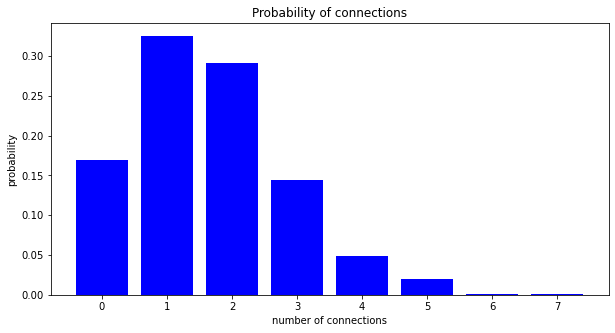

In [132]:
plt.figure(figsize=(10,5))
plt.bar(b.keys(), b.values(), color='b')
plt.title("Probability of connections")
plt.xlabel('number of connections')
plt.ylabel("probability")
plt.show()

# Draft

In [155]:
# csi_loglog_conf = 
# np.array([[i, j, k] for i, j, k in zip(*np.unique(G_leadlag_conf, return_counts=True))])

    

In [57]:
#for checking
# for i,j in df.iloc[k].items():
#     if j != 0:
#         print(i,j)


l3_f4 1
l4_f5 1
l4_f9 1
l4_f10 1
l5_f9 1
l6_f7 1
l7_f6 1
l8_f2 1
l10_f2 1


In [50]:
# Configuration model 
# G is a matrix whose size is the number of nodes 
# G_Simu : df.iloc[k] is a list, and a matrix is stored in each index

days = 10
G_ledlag_conf_csi = np.zeros((10, 10))
for k in range(days): #2418
    G = df.iloc[k]
    Gout = np.sum(G, axis=0)
    Gin = np.sum(G, axis=1)
    tmp = np.zeros((10, 10))
    while np.sum(Gout) != 0:
        L = np.where(Gout != 0)[0]
        R = np.where(Gin != 0)[0]
        L = np.random.choice(L, size=1)
        R = np.random.choice(R, size=1)
        if tmp[L, R] == 1:
            continue
        else:
            tmp[L, R] = 1
        Gout[L] -= 1
        Gin[L] -= 1
    G_ledlag_conf_csi += tmp
csi_loglog_conf = np.array([[i, j] for i, j in zip(*np.unique(G_ledlag_conf_csi, return_counts=True))])
# csi_loglog_conf = np.array([[i, j, k] for i, j, k in zip(*np.unique(G_ledlag_conf_csi, return_counts=True))])



NameError: name 'G_Simu' is not defined

In [135]:
csi_loglog_conf

NameError: name 'csi_loglog_conf' is not defined

In [77]:
df.filter(regex=f'l{col}_')

l6_f1  l6_f2  l6_f3  l6_f4  l6_f5  l6_f6  l6_f7  l6_f8  l6_f9  \
2022-01-01      0      0      0      0      0      0      1      0      0   
2022-01-02      0      0      0      1      0      0      1      0      0   
2022-01-03      0      0      0      1      1      0      1      0      1   
2022-01-04      0      0      0      0      0      1      1      1      0   
2022-01-05      0      0      0      0      0      0      1      0      0   
2022-01-06      0      1      0      0      0      0      1      1      0   
2022-01-07      0      0      0      0      0      0      0      0      0   
2022-01-08      0      0      0      0      0      0      1      0      0   
2022-01-09      0      0      0      0      0      1      1      0      1   
2022-01-10      0      0      1      0      0      0      1      0      0   

            l6_f10  
2022-01-01       0  
2022-01-02       0  
2022-01-03       0  
2022-01-04       0  
2022-01-05       0  
2022-01-06       1  
2022-01-07       0  
2022-01-08       0  
2022-01-09       0  
2022-01-10       0

In [83]:
nodes_degree = pd.DataFrame(index=idx)
for col in range(1,11):
    nodes_degree[col] = df.filter(regex=f'l{col}_').sum(axis=1)


In [124]:
# random_graph._fields

In [145]:
random_graph_all = []

nodes_lst = list(range(1,11))

for day in range(10):
    random_graph = form_edges()
    random_graph = random_graph._asdict()
    for node_i, n in enumerate(nodes_degree.iloc[day]):
        # print(node_i+1, n)
        if n != 0:
            for _ in range(1, n + 1):
                node_j = np.random.choice(nodes_lst)
                random_graph[f"l{node_i+1}_f{node_j}"] = 1
                # print(f"l{node_i+1}_f{node_j}")
    random_graph_all.append(random_graph)
rg = pd.DataFrame(random_graph_all, index = idx)